# Passenger Relations with Flight Network Properties
## 1. Airport Network
### 1.1 Network Visualization

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


In [56]:
# Load the data
busy_airports_path = r'C:\Users\warre\OneDrive\桌面\nus_phy\PC5253\Final\Flight-network\Passenger_relations\busiest_airports_2018.csv'
routes_path = r'C:\Users\warre\OneDrive\桌面\nus_phy\PC5253\Final\Flight-network\Passenger_relations\filtered_routes.csv'

busy_airports = pd.read_csv(busy_airports_path)
filtered_routes = pd.read_csv(routes_path)

# Create a directed graph
G = nx.DiGraph()

# Add nodes using IATA codes from the top 50 busy airports
for index, row in busy_airports.iterrows():
    G.add_node(row['IATA'])  

# Set of busy airports' IATA codes for quick lookup
busy_airports_set = set(busy_airports['IATA'])

# Add edges for routes that connect two busy airports
for index, row in filtered_routes.iterrows():
    if pd.notnull(row['Source_airport']) and pd.notnull(row['Dest_airport']):
        if row['Source_airport'] in busy_airports_set and row['Dest_airport'] in busy_airports_set:
            G.add_edge(row['Source_airport'], row['Dest_airport'])

# Output the basic information about the graph
number_of_nodes = G.number_of_nodes()
number_of_edges = G.number_of_edges()

print(f"Number of nodes: {number_of_nodes}")
print(f"Number of edges: {number_of_edges}")


Number of nodes: 50
Number of edges: 938


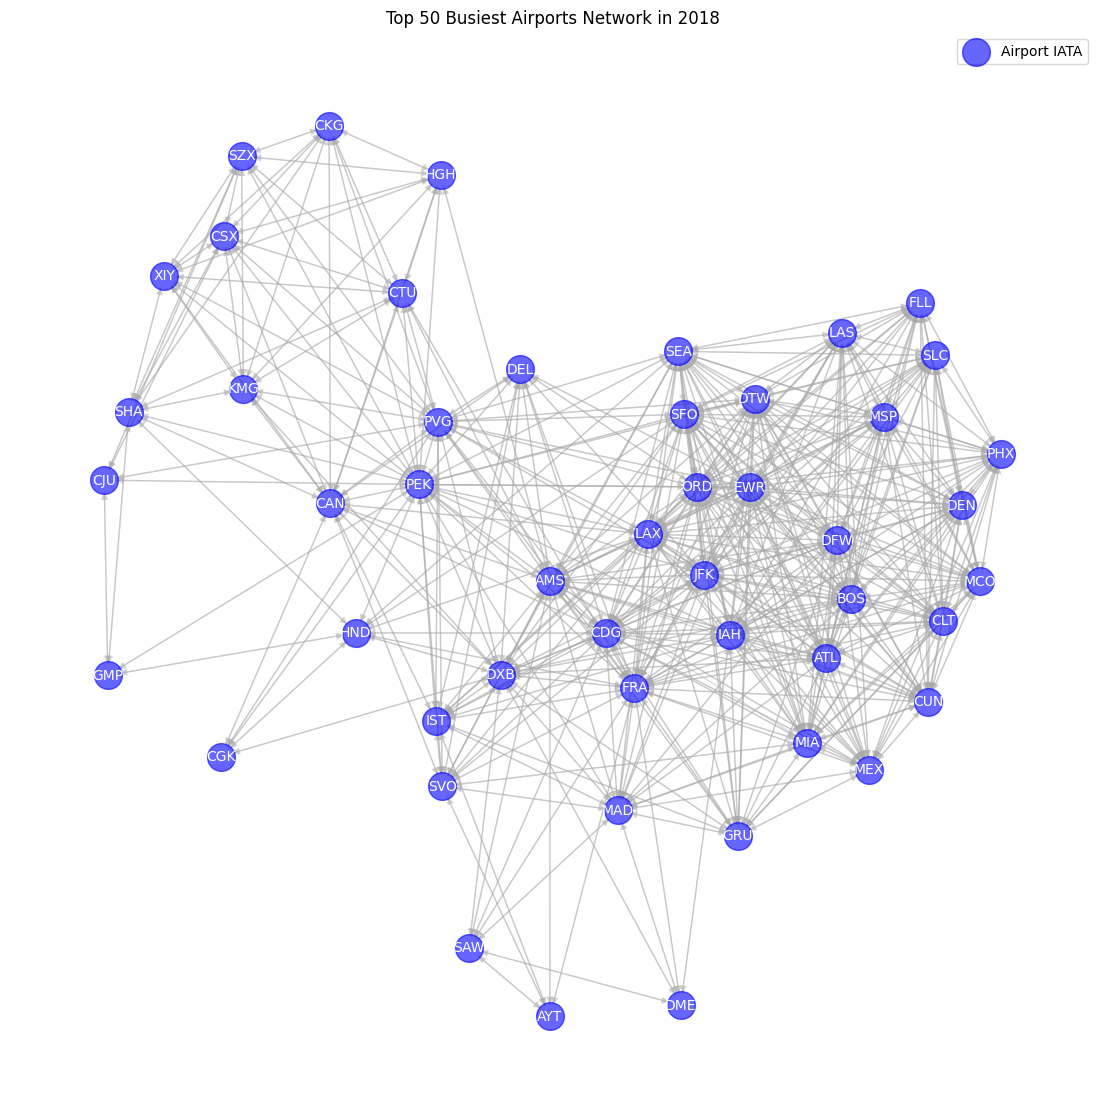

In [71]:
plt.figure(figsize=(14, 14))  
pos = nx.kamada_kawai_layout(G)


nx.draw_networkx_nodes(G, pos, nodelist=large_nodes, node_size=400, node_color='blue', alpha=0.6, label='Airport IATA')
nx.draw_networkx_edges(G, pos, edge_color="#AAAAAA", alpha=0.4,label='Routes')
nx.draw_networkx_labels(G, pos, labels={node: node for node in large_nodes}, font_size=10, font_color='white')

plt.title("Top 50 Busiest Airports Network in 2018")
plt.axis('off')  
plt.legend()
plt.show()

In [50]:
nx.shortest_path(G, 'PKX')

{'PKX': ['PKX']}

## 1.2 Network Property Analysis

### 1.2.1 Gaint Component

In [57]:
# Find the largest connected component (undirected, giant component)
largest_cc = max(nx.connected_components(G.to_undirected()), key=len)
giant_component_size = len(largest_cc)
print(f"Giant component size: {giant_component_size}")
subgraph_LCC = G.subgraph(largest_cc)

# Find the largest strongly connected component (directed,giant component)
largest_scc = max(nx.strongly_connected_components(G), key=len)
giant_component_size_scc = len(largest_scc)
print(f"Largest Strongly Connected Component Size (LWCC): {giant_component_size_scc}")
subgraph = G.subgraph(largest_scc)

Giant component size: 49
Largest Strongly Connected Component Size (LWCC): 49


In [60]:
print("The Average Shortest Path Length:", nx.average_shortest_path_length(subgraph))

The Average Shortest Path Length: 1.7431972789115646


### 1.2.2 Eccentricity, Diameter, and Radius
$\varepsilon \left( i\right) =\max _{j}d_{ij}.$

This metric is defined for each node and gives the maximal shortest path length a node can have with any other node in the network. This tells how far the node is to the farthest point in the network.

$D=\max _{i}\varepsilon ( i)$

Maximal eccentricity of the network. This metric gives the maximal eccentricity in the network. Intuitively, it tells us how far any two nodes can get from one another within the network. Nodes whose eccentricity is $D$ are called peripheries.

$R=\min _{i}\varepsilon (i)$

This metric gives the minimal eccentricity in the network. Intuitively, it tells us the smallest number of steps you will need to reach every node if you can choose an optimal node as a starting point. Nodes whose eccentricity is R are called centers.

In [62]:
nx.eccentricity(subgraph)

{'ATL': 3,
 'DFW': 3,
 'DEN': 3,
 'ORD': 2,
 'LAX': 2,
 'CLT': 3,
 'MCO': 3,
 'CAN': 2,
 'CTU': 3,
 'LAS': 3,
 'PHX': 3,
 'MIA': 3,
 'DEL': 2,
 'IST': 2,
 'SZX': 3,
 'SEA': 2,
 'MEX': 3,
 'CKG': 3,
 'SHA': 3,
 'PEK': 2,
 'KMG': 3,
 'PVG': 2,
 'IAH': 2,
 'CGK': 3,
 'SVO': 2,
 'JFK': 2,
 'XIY': 3,
 'DXB': 2,
 'EWR': 2,
 'HGH': 3,
 'FLL': 3,
 'CDG': 2,
 'HND': 2,
 'CJU': 3,
 'AMS': 2,
 'DME': 3,
 'SAW': 3,
 'FRA': 2,
 'MSP': 3,
 'SFO': 2,
 'GRU': 3,
 'MAD': 2,
 'DTW': 2,
 'BOS': 3,
 'GMP': 3,
 'CUN': 3,
 'SLC': 3,
 'AYT': 3,
 'CSX': 3}

In [68]:
diameter = nx.diameter(subgraph)
print("The diameter of this network is: ",diameter)
periphery = nx.periphery(subgraph)
print("The periphery of this network are: ",periphery)

len(periphery)

The diameter of this network is:  3
The periphery of this network are:  ['ATL', 'DFW', 'DEN', 'CLT', 'MCO', 'CTU', 'LAS', 'PHX', 'MIA', 'SZX', 'MEX', 'CKG', 'SHA', 'KMG', 'CGK', 'XIY', 'HGH', 'FLL', 'CJU', 'DME', 'SAW', 'MSP', 'GRU', 'BOS', 'GMP', 'CUN', 'SLC', 'AYT', 'CSX']


29

In [70]:
radius = nx.radius(subgraph)
print("The radius of this network is: ", radius)
center = nx.center(subgraph)
print("The center of this network are: ", center)
len(center)

The radius of this network is:  2
The center of this network are:  ['ORD', 'LAX', 'CAN', 'DEL', 'IST', 'SEA', 'PEK', 'PVG', 'IAH', 'SVO', 'JFK', 'DXB', 'EWR', 'CDG', 'HND', 'AMS', 'FRA', 'SFO', 'MAD', 'DTW']


20

In [92]:
# 创建排名字典，其中机场代码是键，排名是值
rank_dict = {row['IATA']: idx + 1 for idx, row in busy_airports.iterrows()}


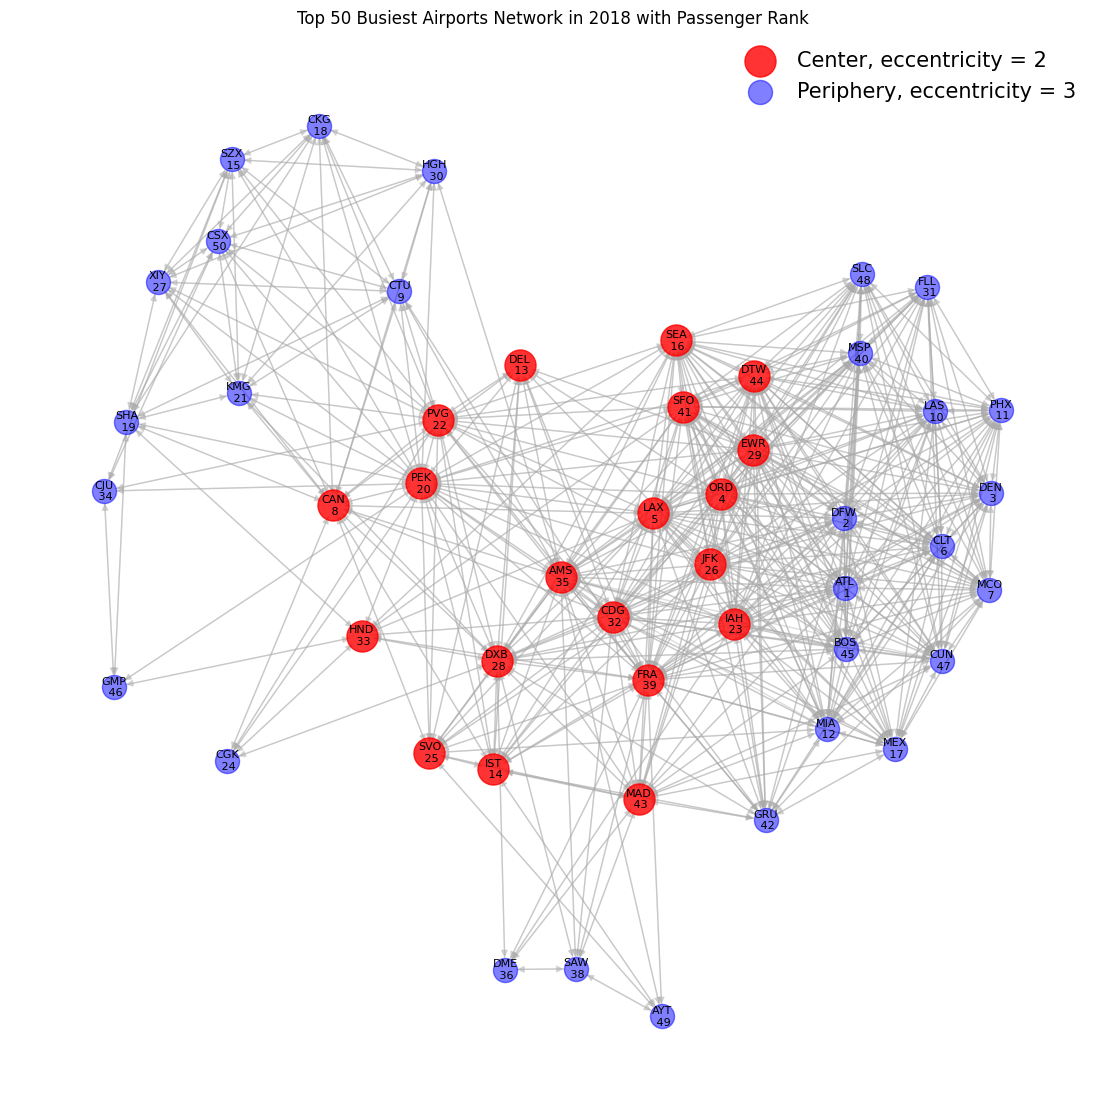

In [100]:

# 假设subgraph是已定义的图对象
plt.figure(figsize=(14, 14))  # 设置图形大小

# 使用kamada_kawai布局
pos_2 = nx.kamada_kawai_layout(subgraph)

# 调整节点大小，分别显示Center和Periphery
large_nodes = center  # Center节点
small_nodes = periphery  # Periphery节点

# 绘制节点和边
large_node_draw = nx.draw_networkx_nodes(subgraph, pos_2, nodelist=large_nodes, node_size=500, node_color='red', alpha=0.8, label="Center, eccentricity = 2")
small_node_draw = nx.draw_networkx_nodes(subgraph, pos_2, nodelist=small_nodes, node_size=300, node_color='blue', alpha=0.5, label="Periphery, eccentricity = 3")
nx.draw_networkx_edges(subgraph, pos_2, edge_color="#AAAAAA", alpha=0.4)

# 为所有节点添加包含排名的标签
labels = {node: f"{node}\n {rank_dict.get(node, 'N/A')}" for node in subgraph.nodes()}
nx.draw_networkx_labels(subgraph, pos_2, labels=labels, font_size=8, font_color='black')

# 添加并调整图例位置和布局
plt.legend(handles=[large_node_draw, small_node_draw], loc='upper right', scatterpoints=1, frameon=False, fontsize=15)

# 显示图形设置
plt.title("Top 50 Busiest Airports Network in 2018 with Passenger Rank")
plt.axis('off')  # 关闭坐标轴显示
plt.show()


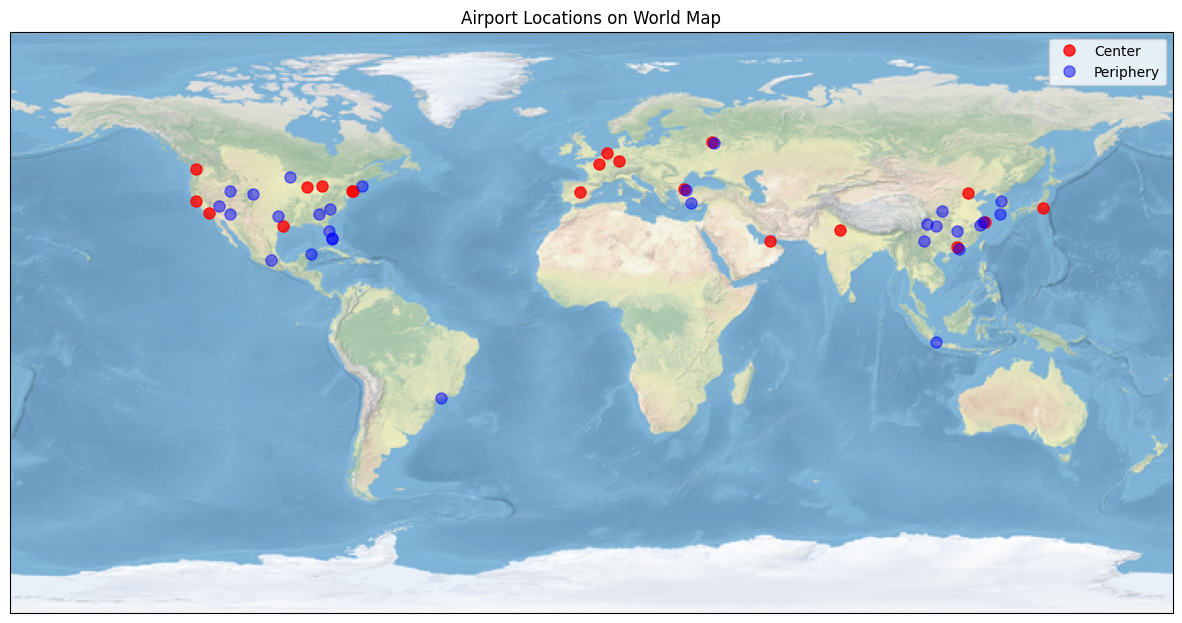

In [139]:
import matplotlib.image as mpimg
import cartopy.crs as ccrs

# Reload the airport data which was previously uploaded as airports.dat
airport_data_path = r'C:\Users\warre\OneDrive\桌面\nus_phy\PC5253\Final\Flight-network\airports.dat'
airport_data = pd.read_csv(airport_data_path, header=None)

# Assigning column names for ease of understanding based on typical airports.dat structure
airport_data.columns = ['Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz', 'Type', 'Source']

# Filtering out the relevant airports based on the given IATA codes
combined_iata_codes = center + periphery

# Extract the latitude and longitude for these airports
airport_locations = airport_data[airport_data['IATA'].isin(combined_iata_codes)][['IATA', 'Latitude', 'Longitude']]
airport_locations_dict = airport_locations.set_index('IATA')[['Latitude', 'Longitude']].T.to_dict('dict')


# Load the world map image
world_map_img = mpimg.imread(r'C:\Users\warre\OneDrive\桌面\nus_phy\PC5253\Final\Flight-network\Longitude-and-Latitude-Map_00.png')

# Create a plot
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.stock_img()

# 在世界地图上标出中心机场的位置
for iata in center:
    lat, lon = airport_locations_dict[iata]['Latitude'], airport_locations_dict[iata]['Longitude']
    ax.plot(lon, lat, 'ro', alpha=0.8,markersize=8, label='Center' if iata == center[0] else "")

# 标出外围机场的位置
for iata in periphery:
    lat, lon = airport_locations_dict[iata]['Latitude'], airport_locations_dict[iata]['Longitude']
    ax.plot(lon, lat, 'bo', alpha=0.5,markersize=8, label='Periphery' if iata == periphery[0] else "")


# Add legend and labels
ax.legend()
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Airport Locations on World Map')

# Show the plot
plt.show()


### 1.2.3 Individual node centrality
### Degree centrality
$C_d(i)=k_i/(n-1)$

Degree centrality is simply a normalized node degree, i.e., the actual degree divided by the maximal degree possible $(n -1)$. For directed networks, you can define in-degree centrality and out-degree centrality separately.

1. Twitter: higher follower counts means higher influence (higher out-degree)
1. Citattion network: higher citation of a research paper means higher impact (higher in-degree)
1. Flight network: higher degree means higher accessibility.

In [165]:
# 计算各种中心性
degree_centrality = nx.degree_centrality(subgraph)
closeness_centrality = nx.closeness_centrality(subgraph)
betweenness_centrality = nx.betweenness_centrality(subgraph)
eigenvector_centrality = nx.eigenvector_centrality(subgraph)
katz_centrality = nx.katz_centrality(subgraph, alpha=0.005, max_iter=5000)  # Katz中心性需要一个alpha参数，值得注意的是在默认的1000次计算内结果并未收敛
pagerank = nx.pagerank(subgraph)
clustering = nx.clustering(subgraph)

centrality_measures = [
    ('Degree Centrality', degree_centrality),
    ('Closeness Centrality', closeness_centrality),
    ('Betweenness Centrality', betweenness_centrality),
    ('Eigenvector Centrality', eigenvector_centrality),
    ('Katz Centrality', katz_centrality),
    ('PageRank', pagerank),
    ('Clustering Coefficient', clustering)
]

# 反转IATA代码顺序
iata_codes_reversed = list(rank_dict.keys())[::-1]  # 反转顺序
# 定义中心机场和外围机场的颜色和透明度，和之前保持一致
colors = ['red' if iata in center else 'blue' for iata in iata_codes_reversed]
alphas = [0.8 if iata in center else 0.5 for iata in iata_codes_reversed]

In [150]:
# 获取 center 和 periphery 机场的度数
center_degrees = [degree_centrality[iata] for iata in center]
periphery_degrees = [degree_centrality[iata] for iata in periphery]

# 使用 numpy 计算平均数、中位数和方差
center_mean = np.mean(center_degrees)
center_median = np.median(center_degrees)
center_variance = np.var(center_degrees)

periphery_mean = np.mean(periphery_degrees)
periphery_median = np.median(periphery_degrees)
periphery_variance = np.var(periphery_degrees)

# 打印结果
print("Center Degree Centrality Statistics:")
print("Mean: {:.4f}".format(center_mean))
print("Median: {:.4f}".format(center_median))
print("Variance: {:.4f}".format(center_variance))

print("\nPeriphery Degree Centrality Statistics:")
print("Mean: {:.4f}".format(periphery_mean))
print("Median: {:.4f}".format(periphery_median))
print("Variance: {:.4f}".format(periphery_variance))

Center Degree Centrality Statistics:
Mean: 1.0188
Median: 1.1458
Variance: 0.0831

Periphery Degree Centrality Statistics:
Mean: 0.6451
Median: 0.7500
Variance: 0.1003


### Closeness centrality
$C_{c}\left( i\right) =\left( \dfrac{\Sigma_jd_{ij}}{n-1}\right) ^{-1}$

 It is a centrality score that measures the mean distance from a node to other nodes.

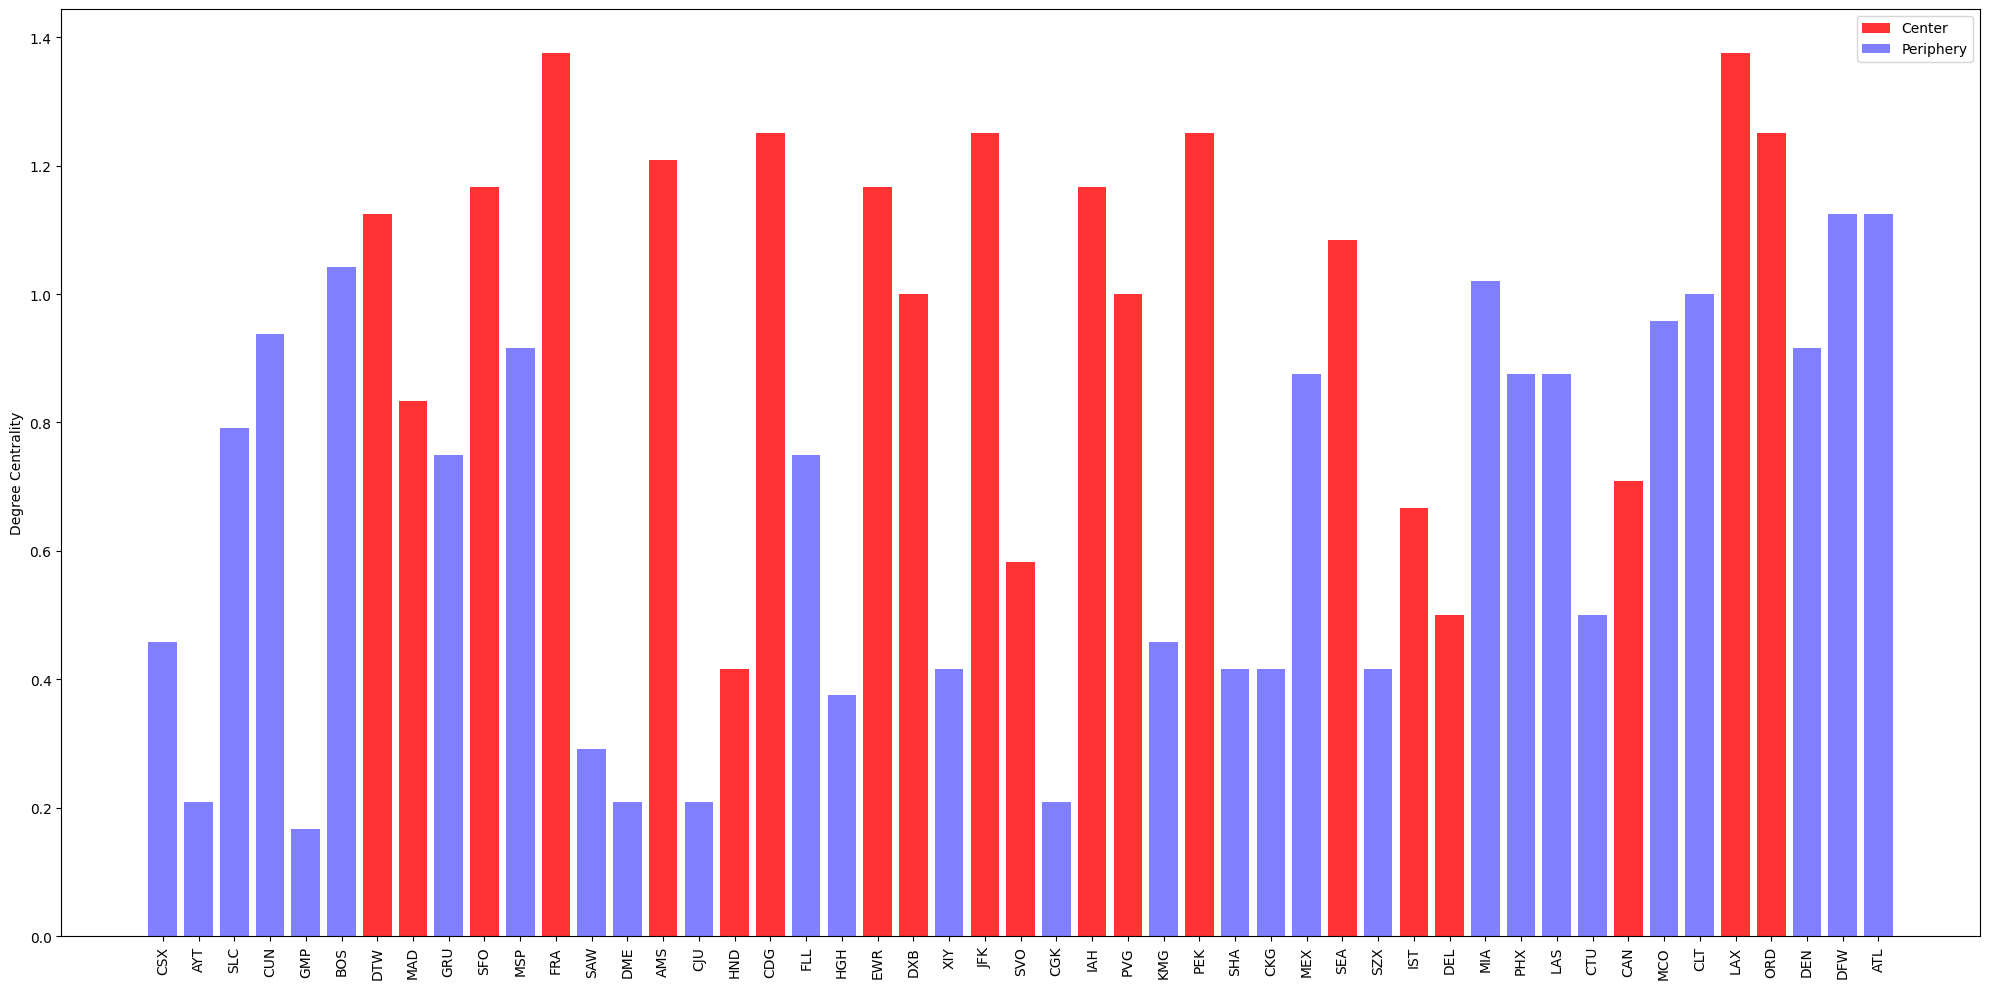

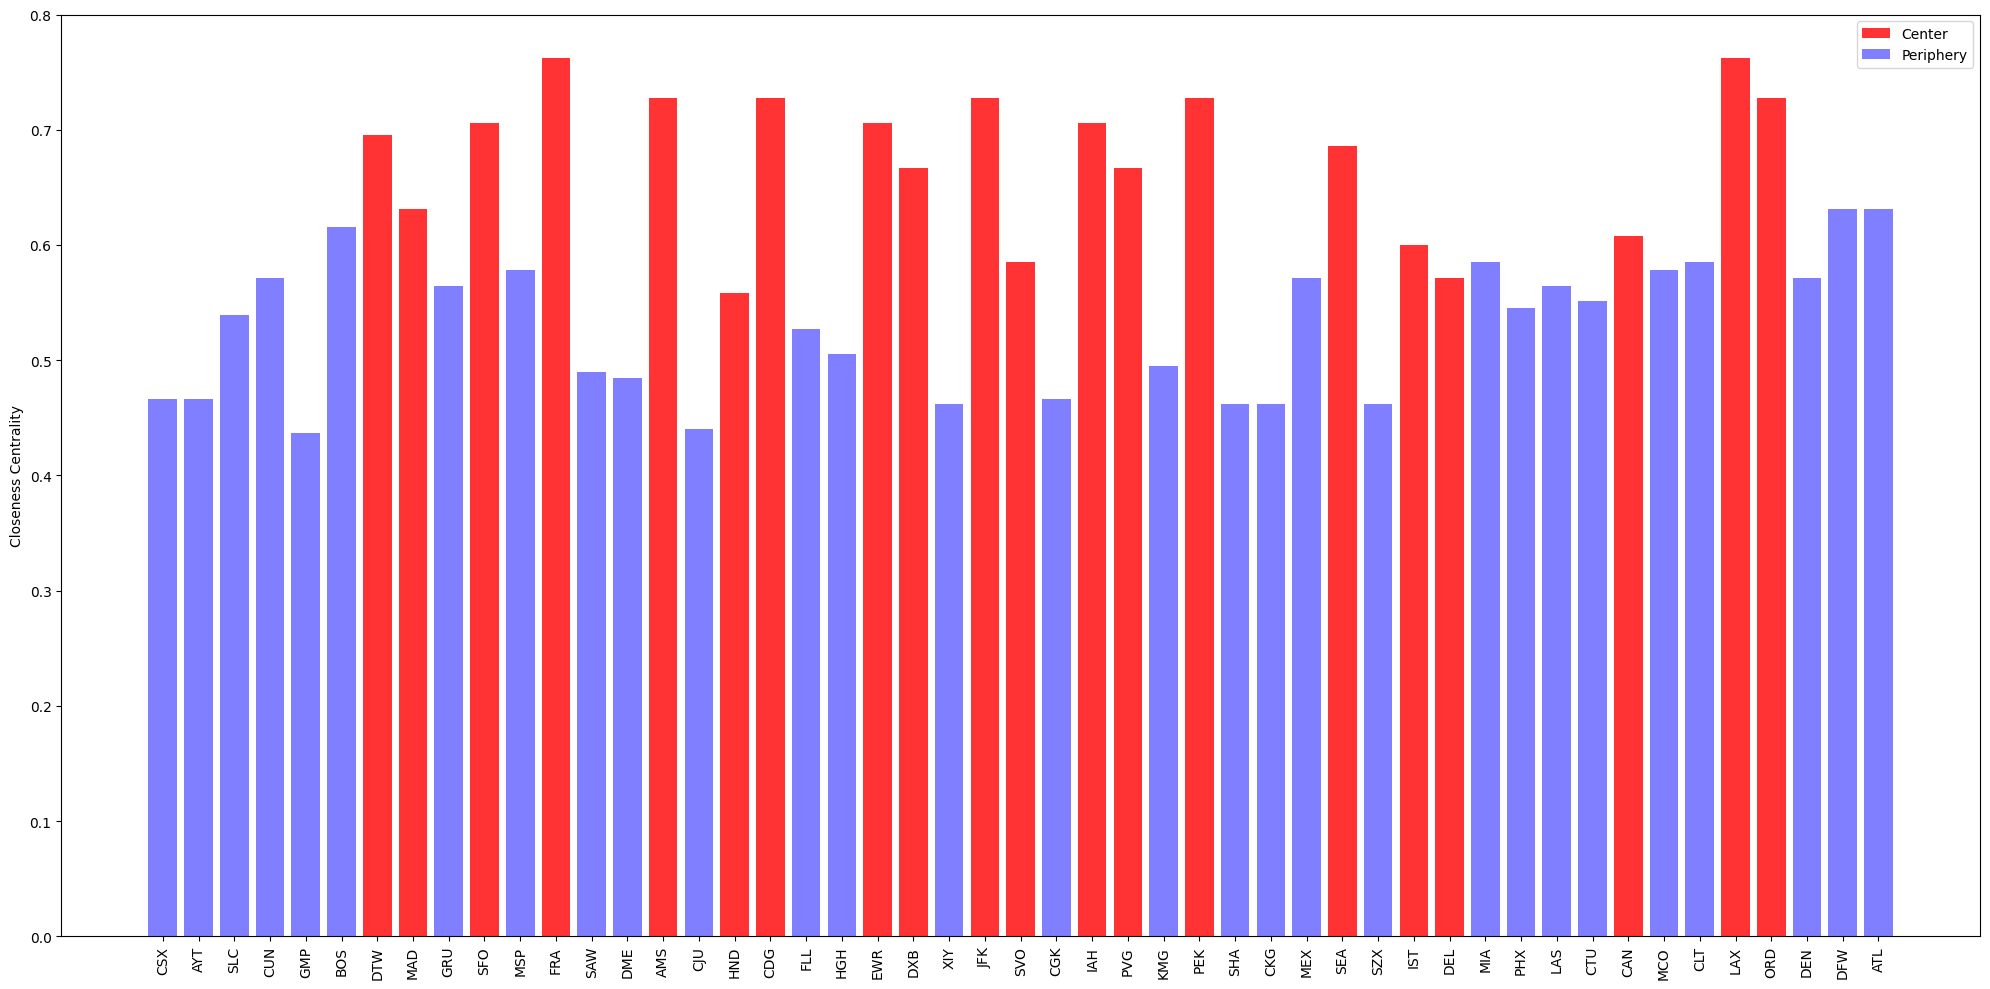

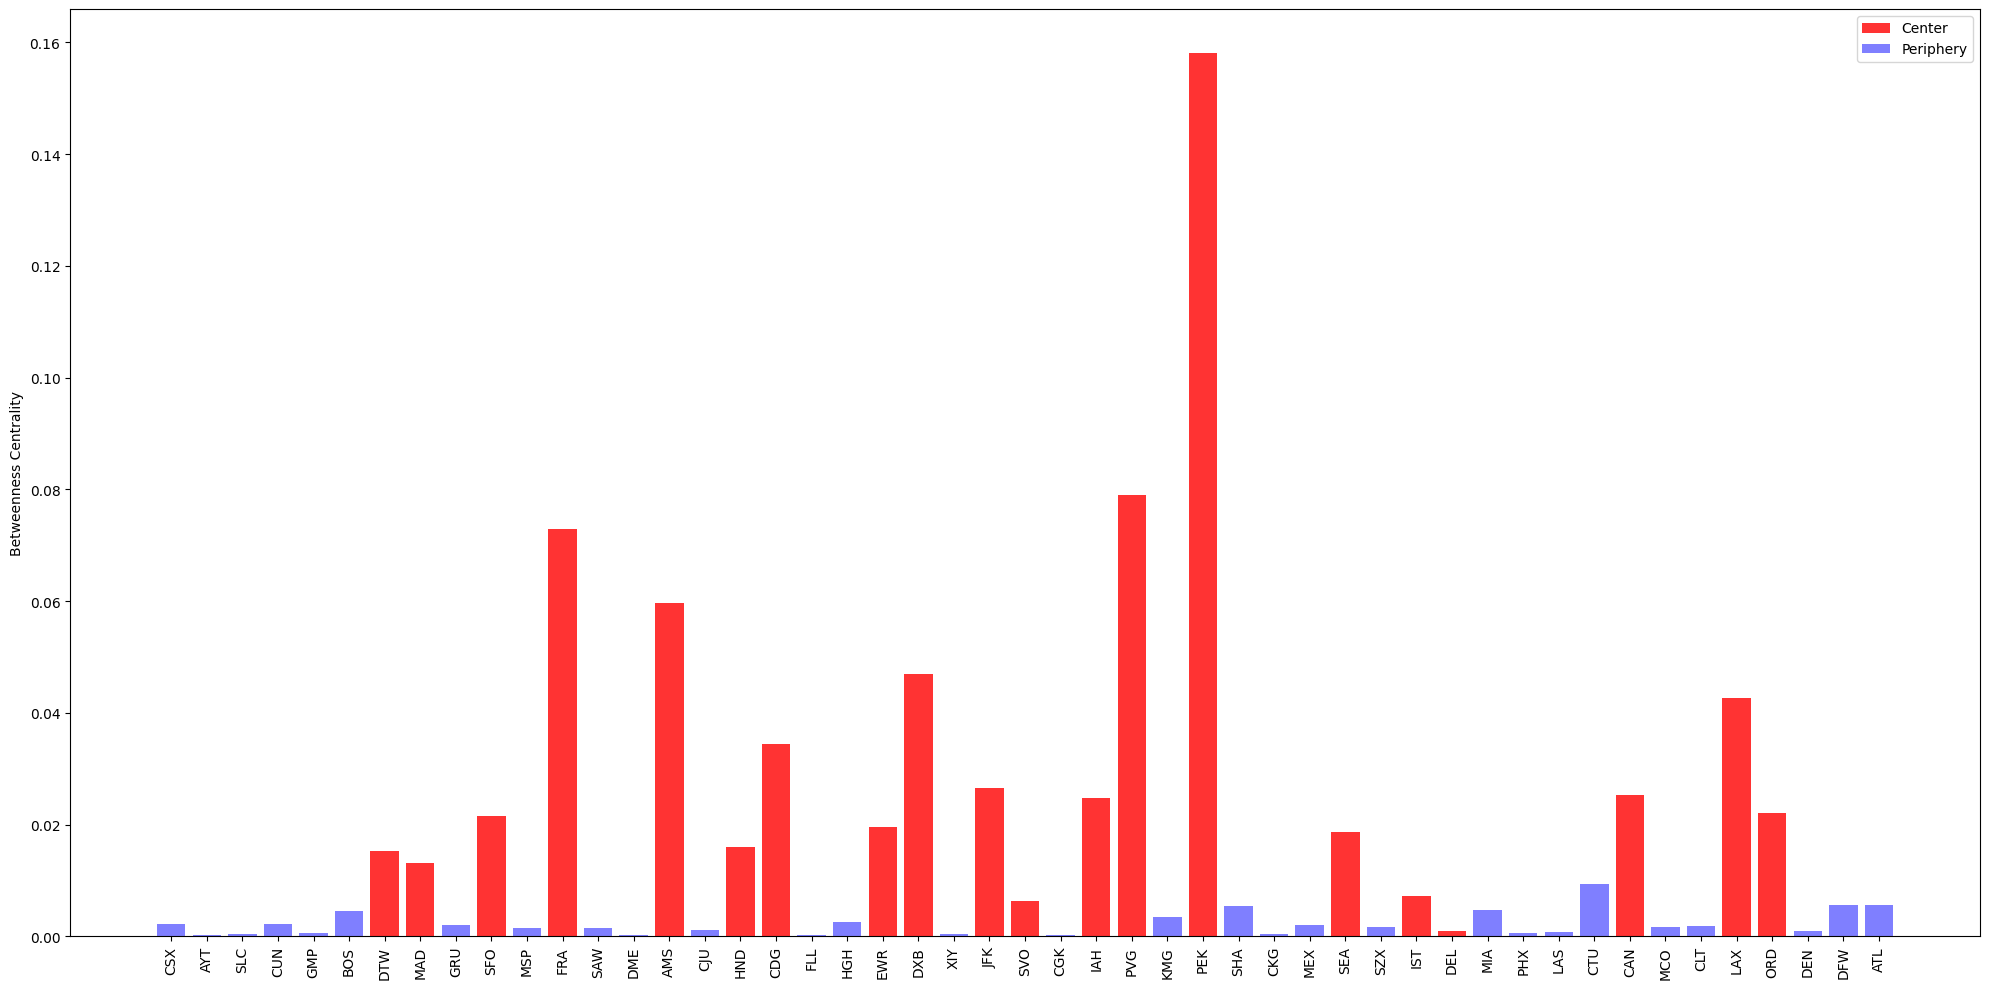

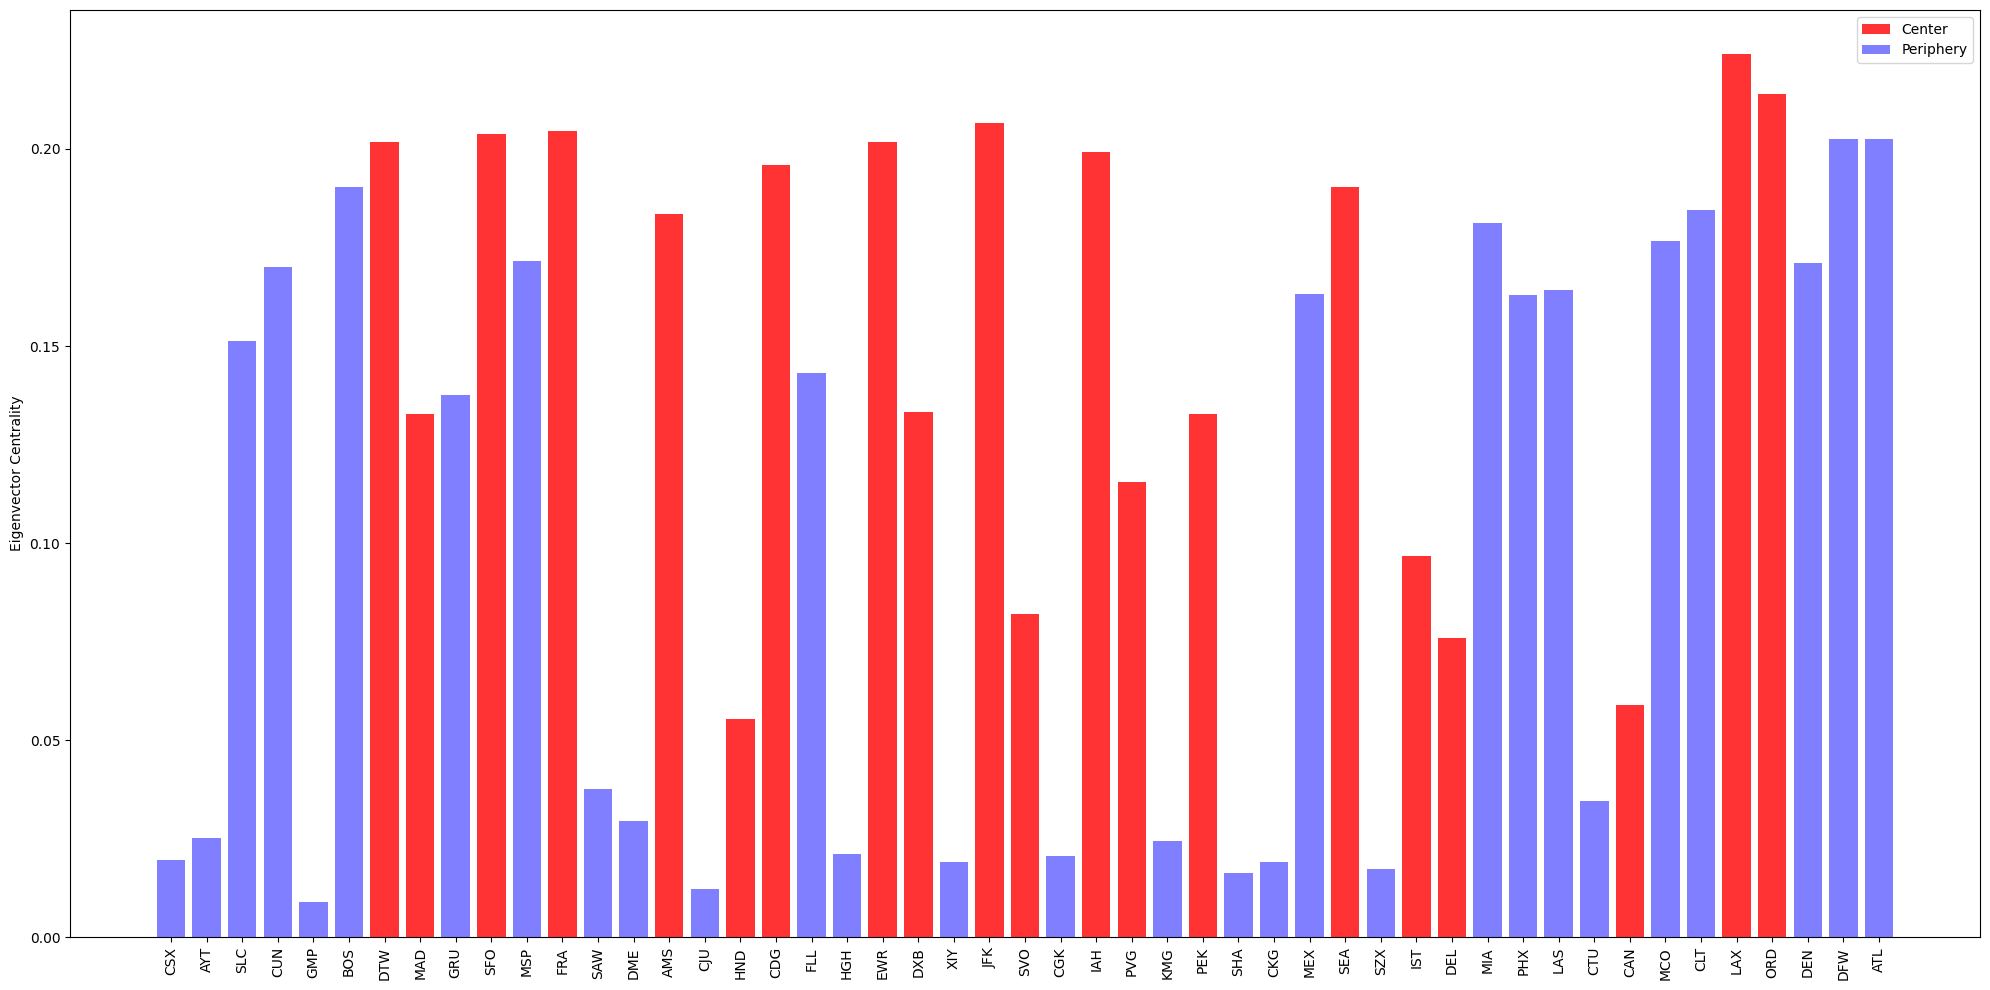

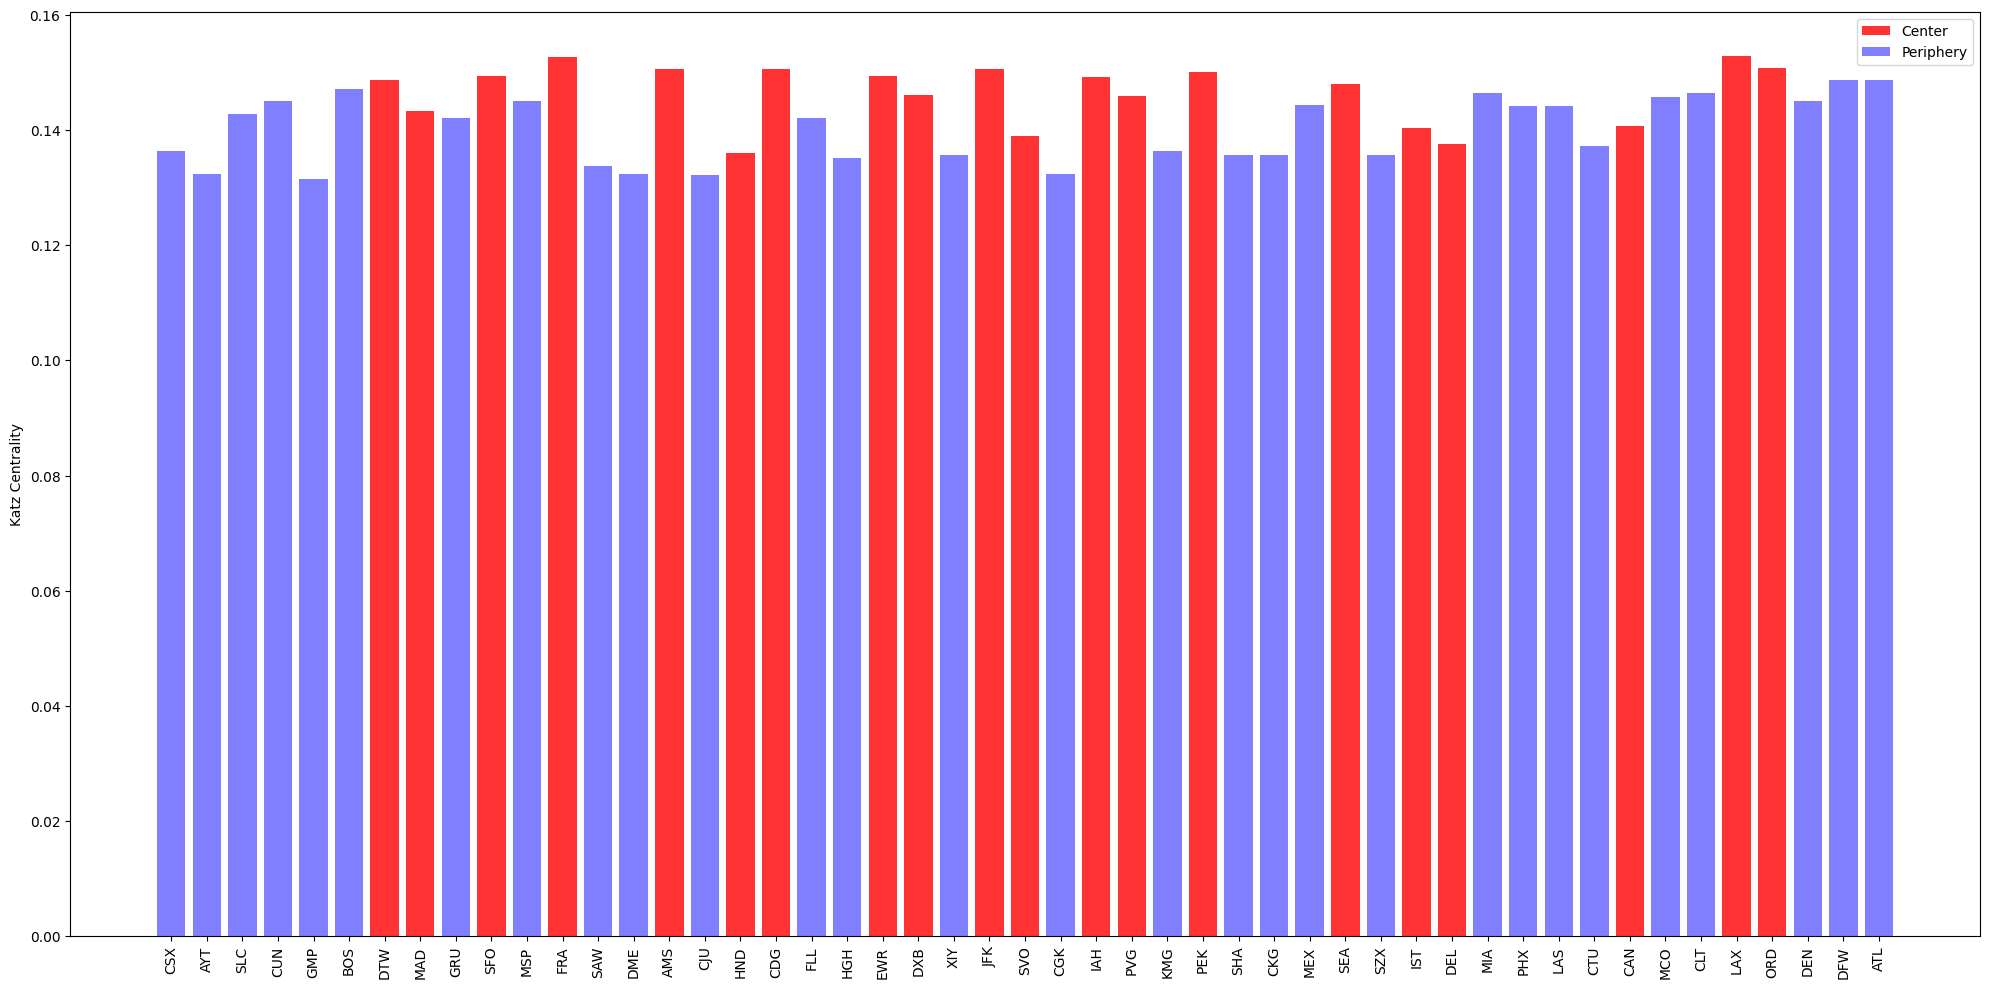

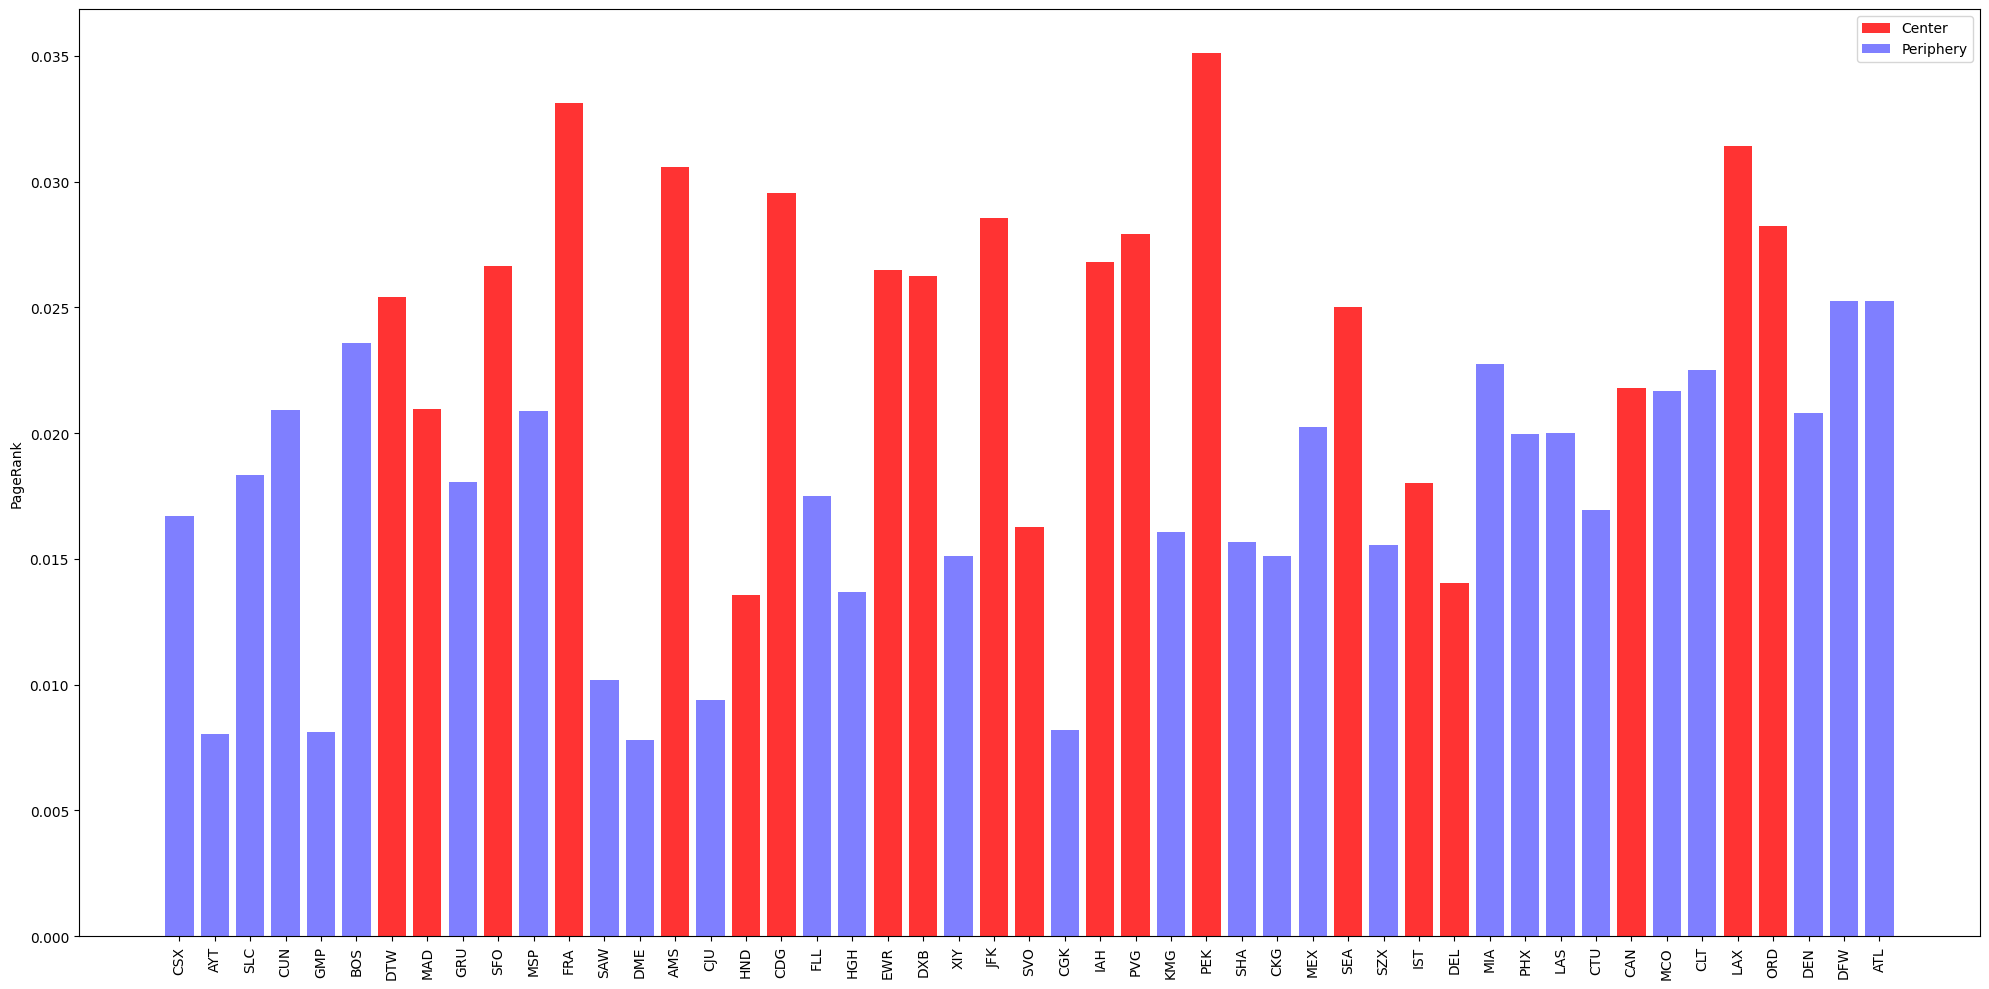

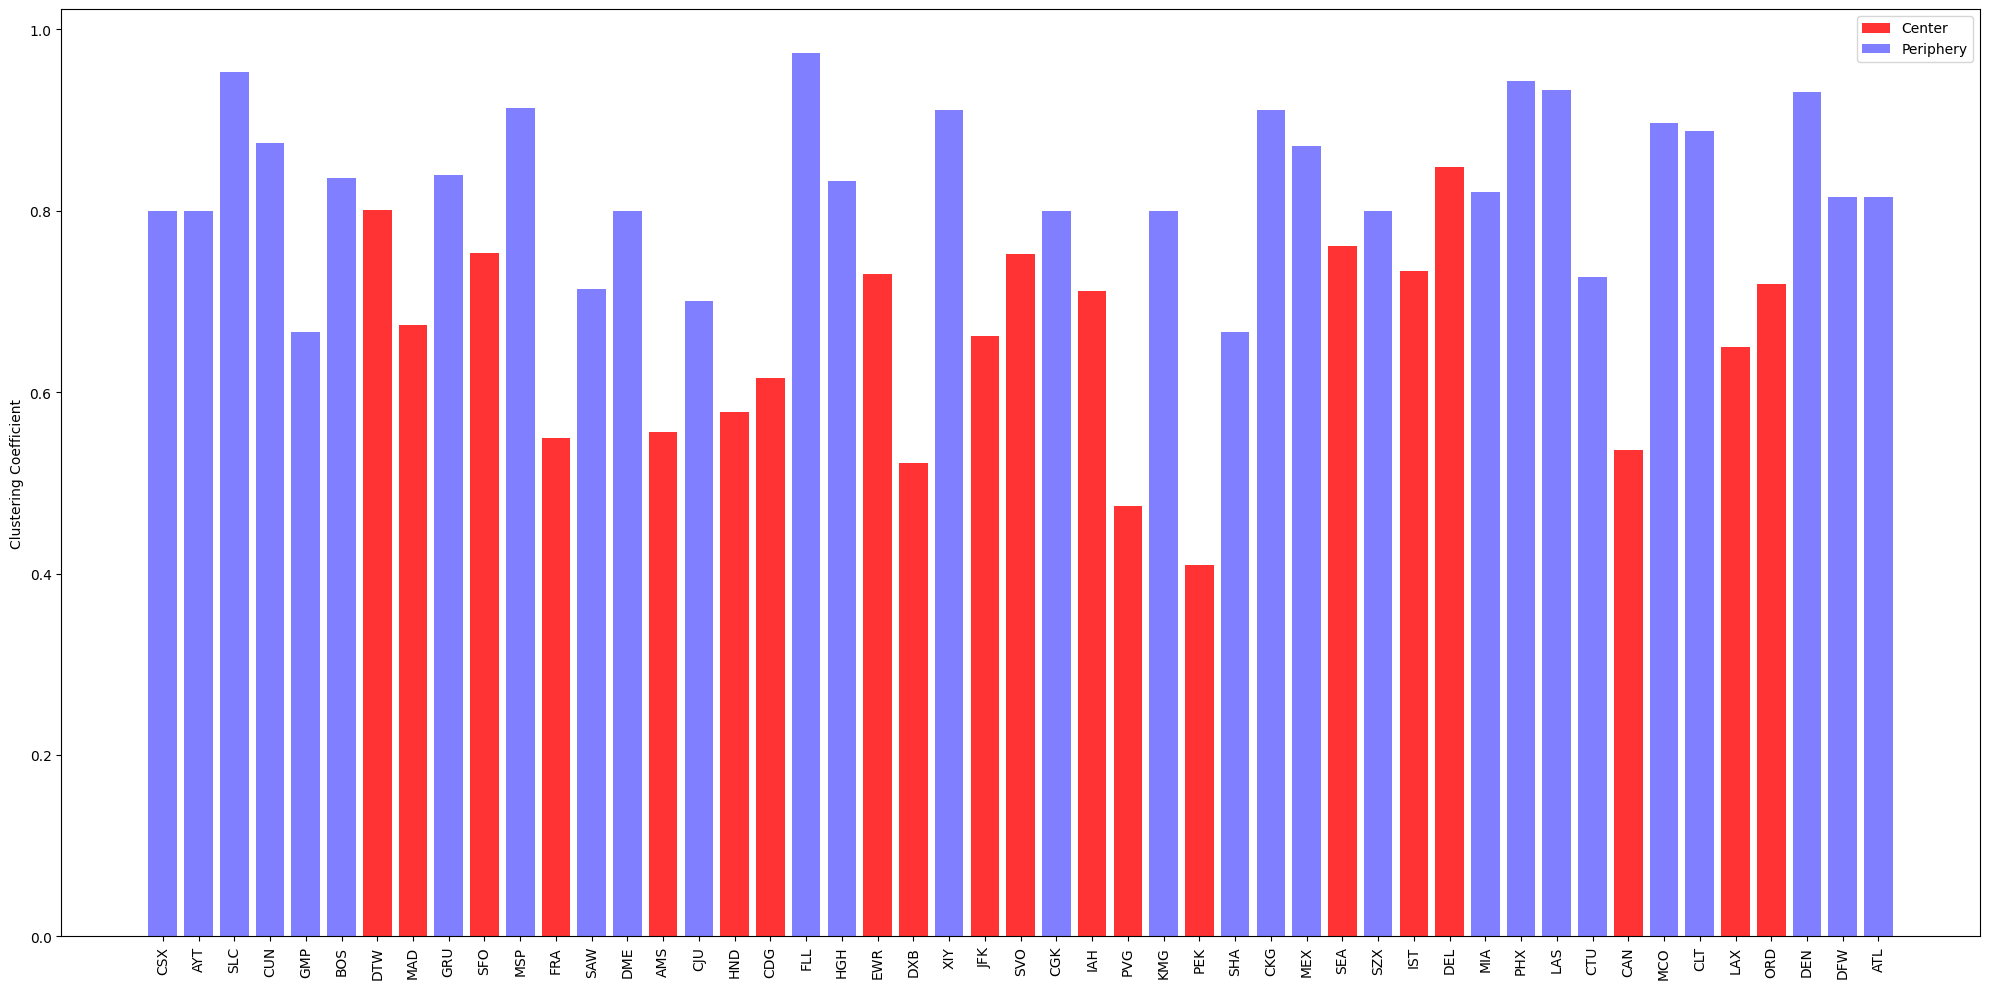

In [166]:
# 遍历每个中心性指标并绘制统计图
for measure_name, centrality_dict in centrality_measures:
    centrality_values = [centrality_dict.get(iata, 0) for iata in iata_codes_reversed]

    plt.figure(figsize=(20, 10))
    for i, iata in enumerate(iata_codes_reversed):
        plt.bar(iata, centrality_values[i], color=colors[i], alpha=alphas[i])

    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='red', label='Center', alpha=0.8),
                       Patch(facecolor='blue', label='Periphery', alpha=0.5)]
    plt.legend(handles=legend_elements, loc='upper right')

    plt.ylabel(measure_name)
    plt.xticks(rotation=90) 
    plt.tight_layout()
    plt.show()

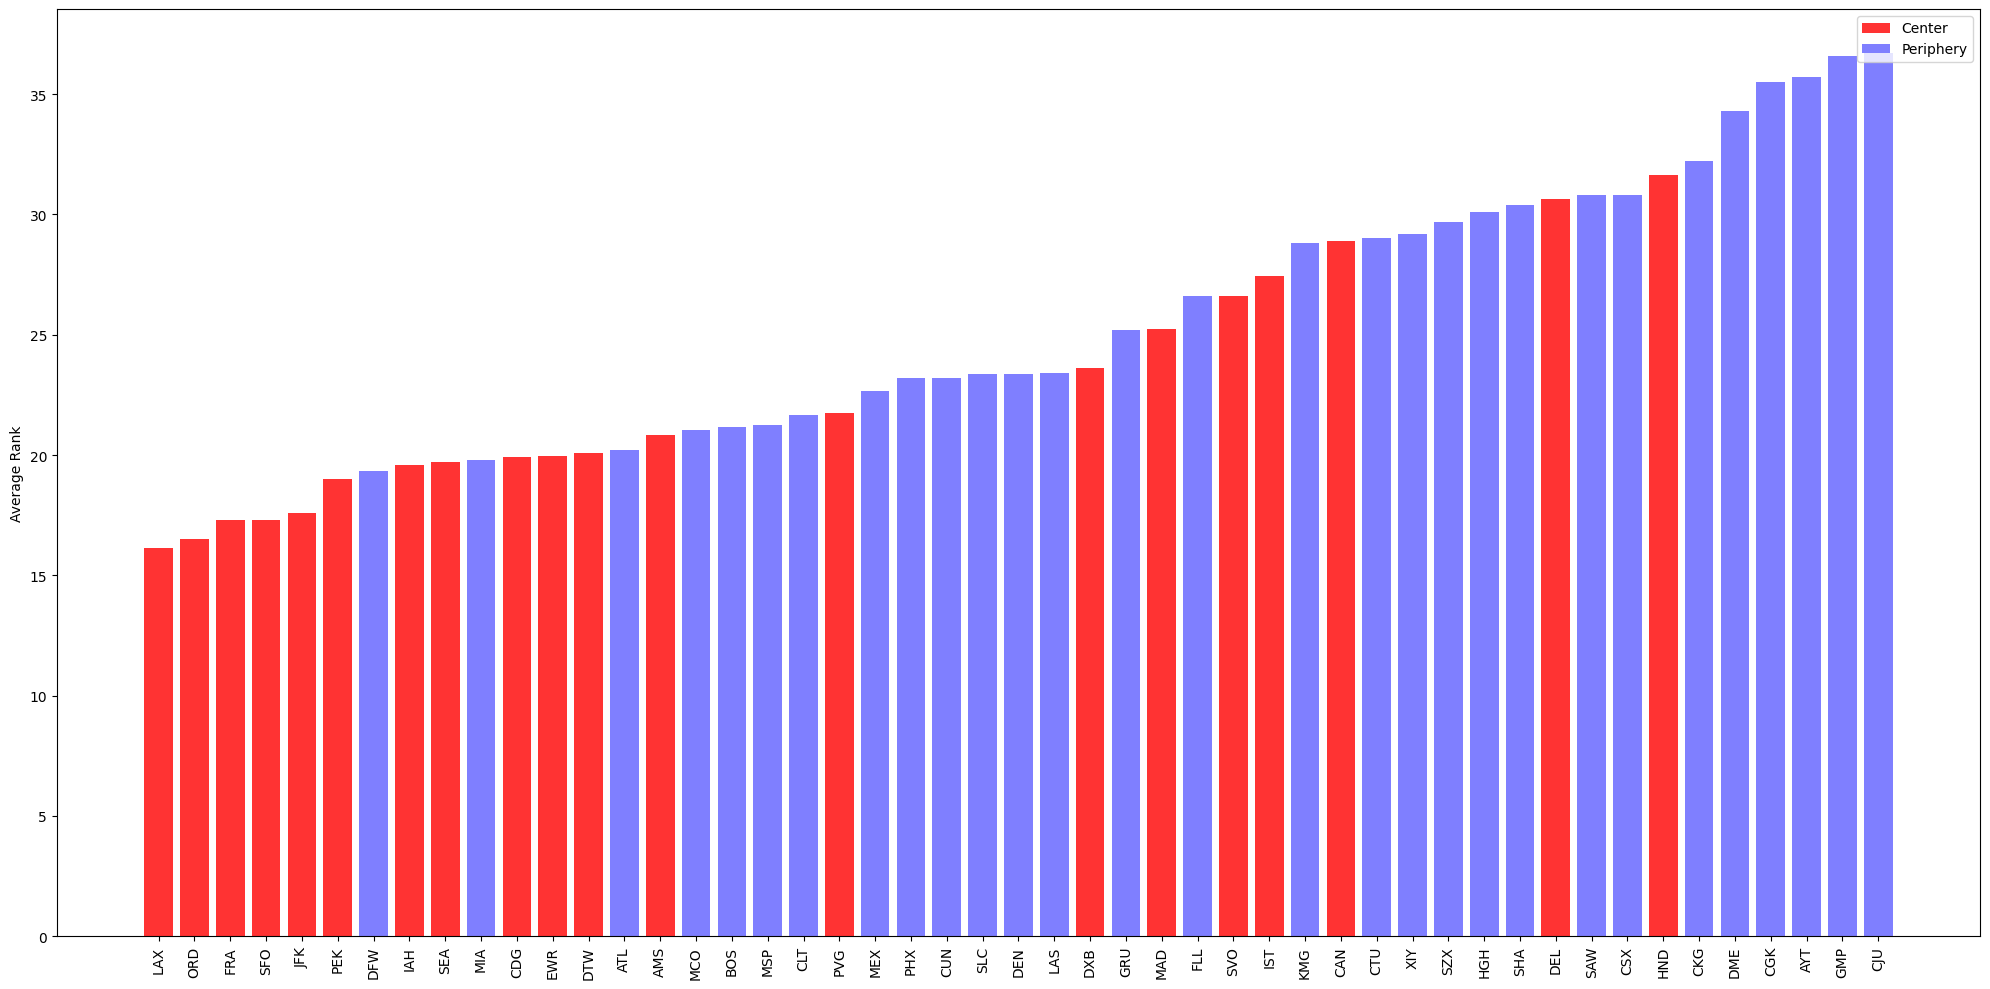

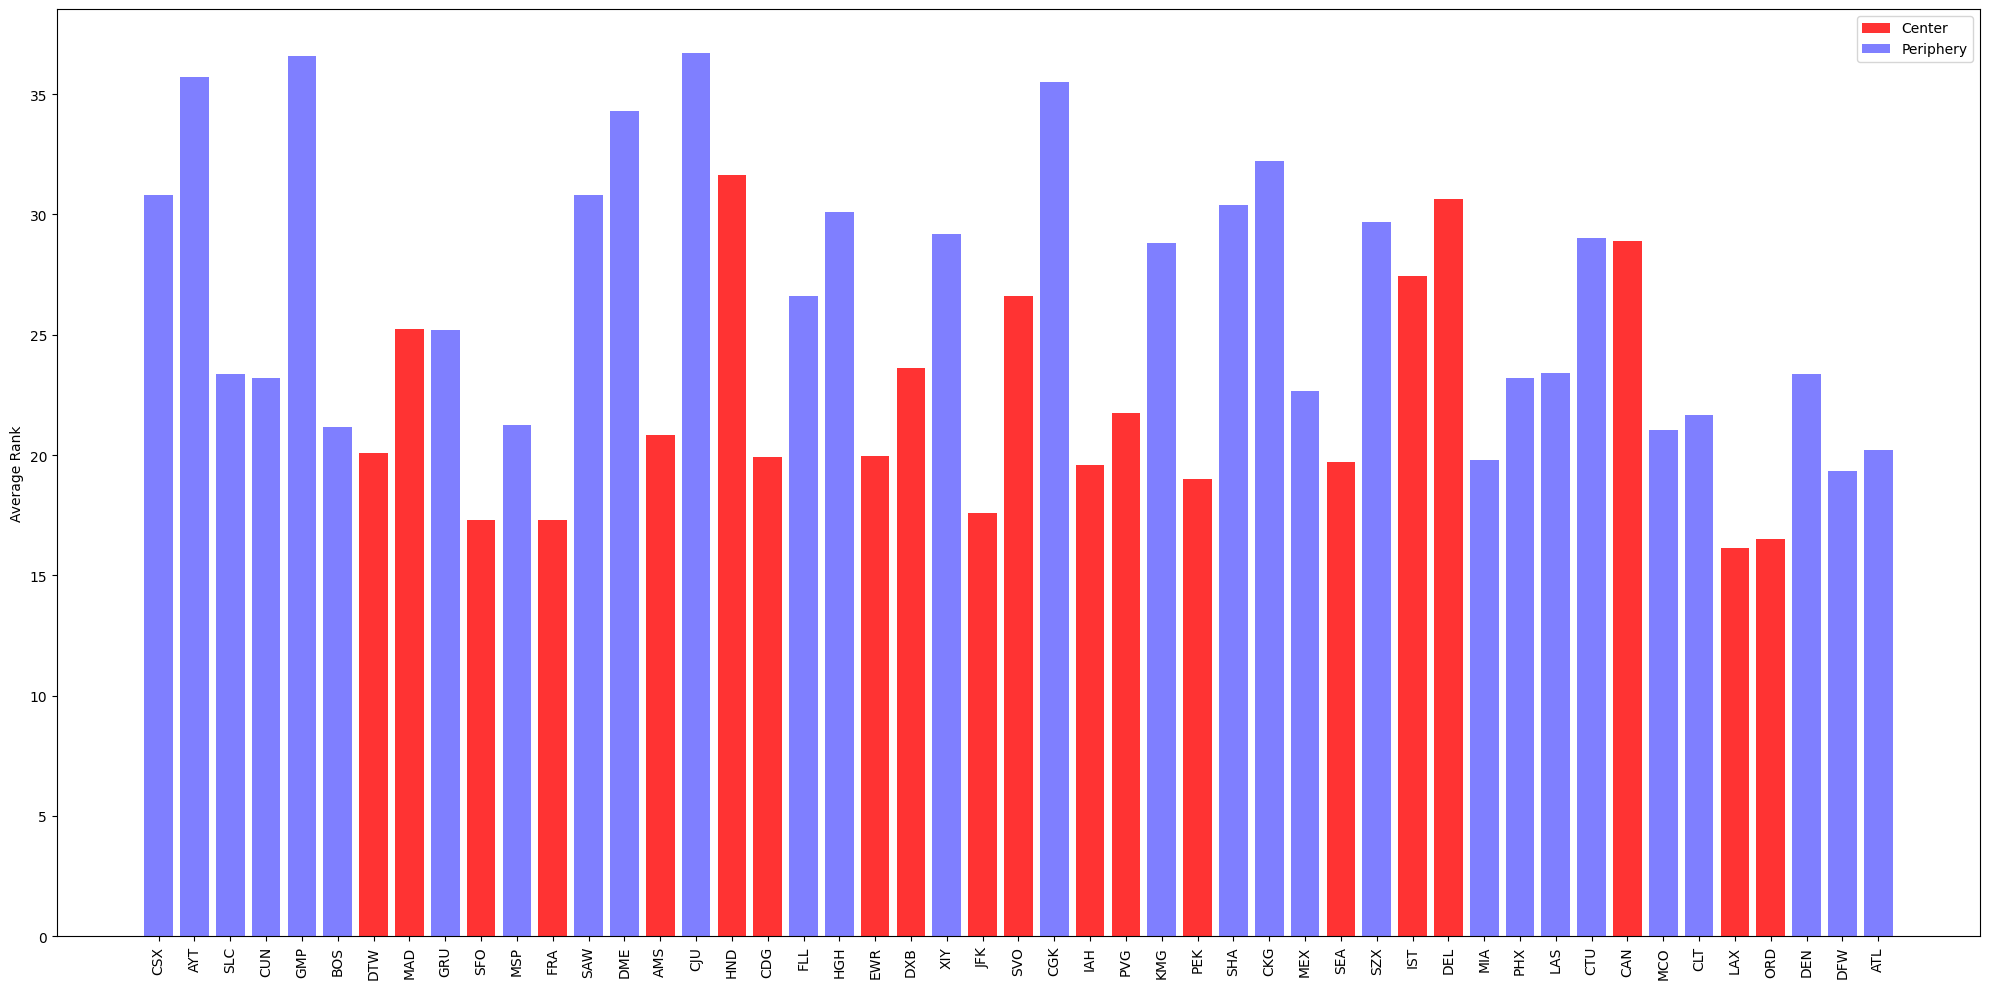

In [170]:
# 对每个中心性指标进行排名
ranked_stats = airport_stats.rank(ascending=False)

# 计算每个 IATA 编号的平均排名
average_ranks = ranked_stats.mean(axis=1)

# 将平均排名添加到 airport_stats 数据框中
airport_stats['Average Rank'] = average_ranks

# 按平均排名对 airport_stats 进行排序
airport_stats_sorted = airport_stats.sort_values('Average Rank')

# 绘制平均排名的条形图
plt.figure(figsize=(20, 10))

for i, iata in enumerate(airport_stats_sorted['IATA']):
    color = 'red' if iata in center else 'blue'
    alpha = 0.8 if iata in center else 0.5
    plt.bar(iata, airport_stats_sorted['Average Rank'].iloc[i], color=color, alpha=alpha)

plt.ylabel('Average Rank')
plt.xticks(rotation=90)
plt.tight_layout()

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', label='Center', alpha=0.8),
                   Patch(facecolor='blue', label='Periphery', alpha=0.5)]
plt.legend(handles=legend_elements, loc='upper right')

plt.show()

# 按 iata_codes_reversed 的顺序对 airport_stats 进行排序
airport_stats_sorted = airport_stats.set_index('IATA').loc[iata_codes_reversed].reset_index()
plt.figure(figsize=(20, 10))

for i, iata in enumerate(iata_codes_reversed):
    color = 'red' if iata in center else 'blue'
    alpha = 0.8 if iata in center else 0.5
    plt.bar(iata, airport_stats_sorted['Average Rank'].iloc[i], color=color, alpha=alpha)

plt.ylabel('Average Rank')
plt.xticks(rotation=90)
plt.tight_layout()

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', label='Center', alpha=0.8),
                   Patch(facecolor='blue', label='Periphery', alpha=0.5)]
plt.legend(handles=legend_elements, loc='upper right')

plt.show()

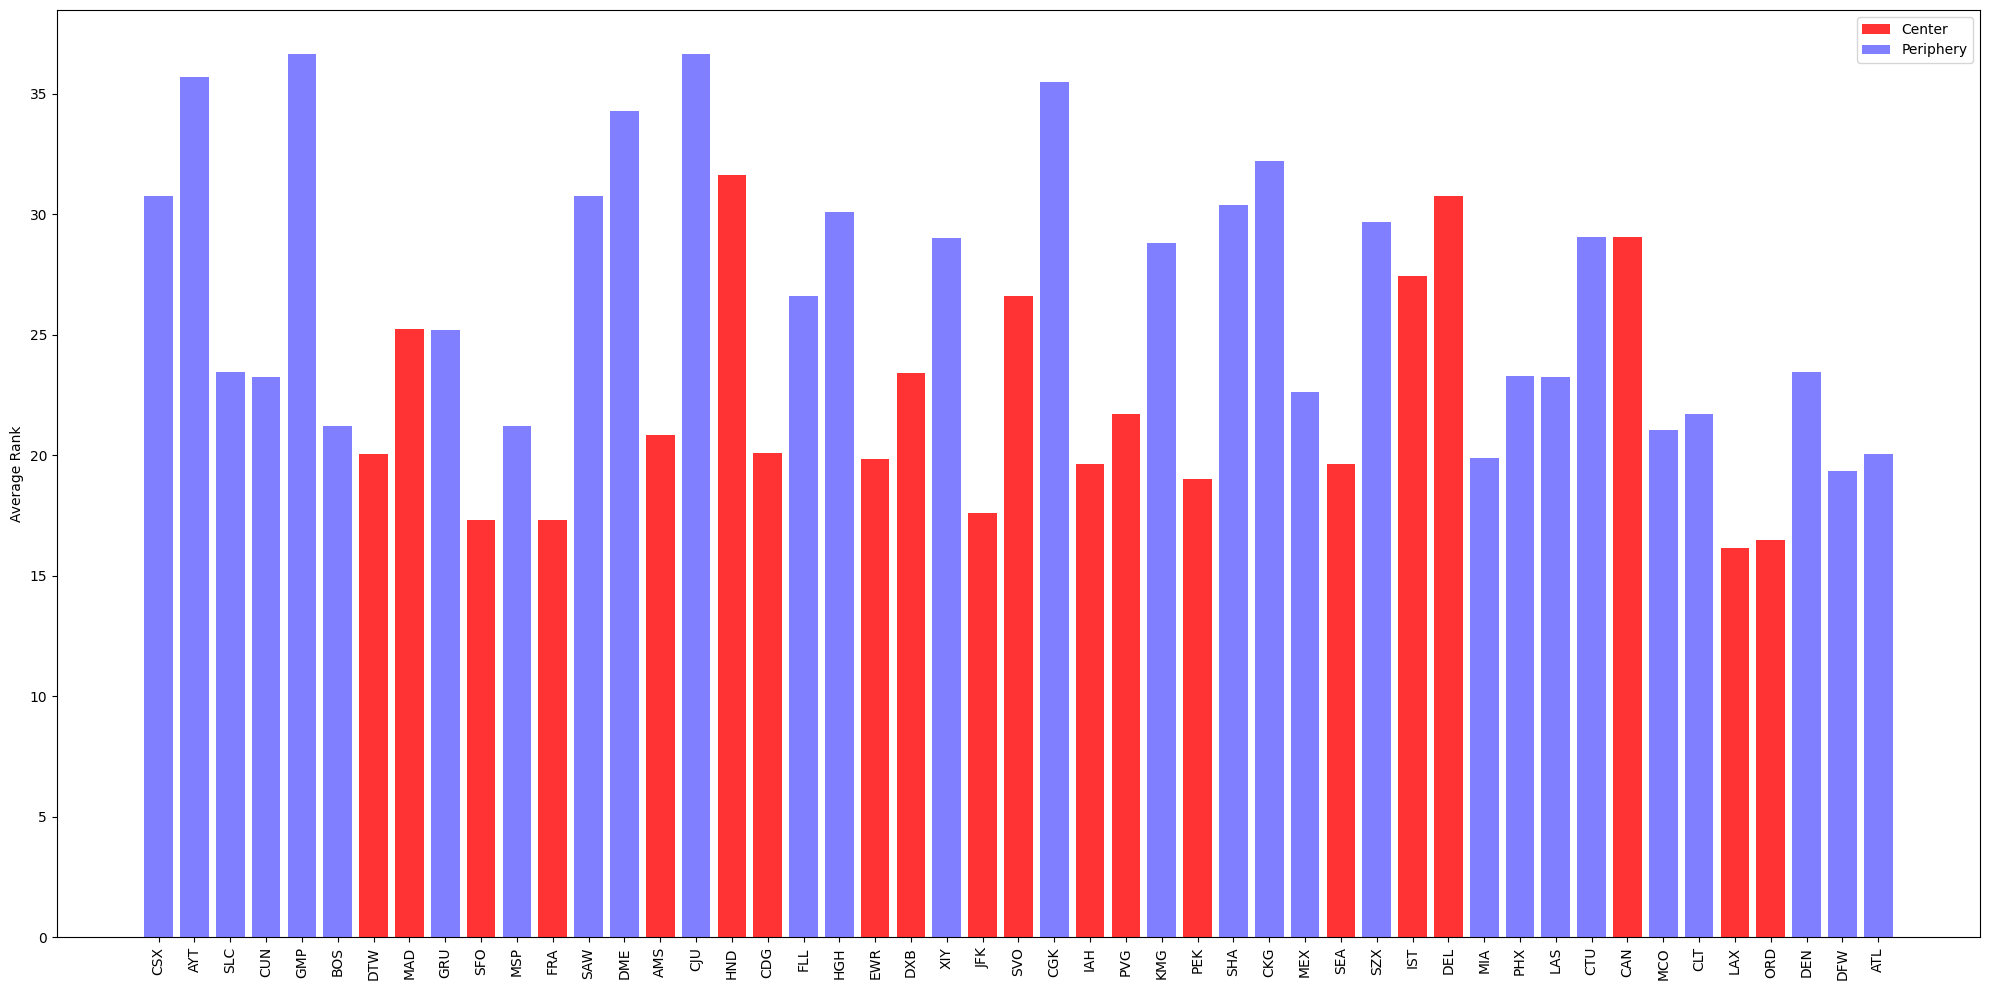

In [171]:
airport_stats

,IATA,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality,Katz Centrality,PageRank,Clustering Coefficient,Type,Average Rank
0,ATL,1.125000,0.631579,0.005580,0.202414,0.148644,0.025251,0.814815,Periphery,20.20
1,DFW,1.125000,0.631579,0.005580,0.202414,0.148644,0.025251,0.814815,Periphery,19.35
2,DEN,0.916667,0.571429,0.000916,0.171114,0.144999,0.020804,0.930736,Periphery,23.35
3,ORD,1.250000,0.727273,0.022026,0.213907,0.150774,0.028250,0.719540,Center,16.50
4,LAX,1.375000,0.761905,0.042729,0.224041,0.152885,0.031408,0.649621,Center,16.15
5,CLT,1.000000,0.585366,0.001882,0.184442,0.146455,0.022502,0.887681,Periphery,21.65
6,MCO,0.958333,0.578313,0.001591,0.176613,0.145706,0.021661,0.897233,Periphery,21.05
7,CAN,0.708333,0.607595,0.025299,0.058901,0.140776,0.021808,0.536765,Center,28.90
8,CTU,0.500000,0.551724,0.009393,0.034658,0.137240,0.016962,0.727273,Periphery,29.00
9,LAS,0.875000,0.564706,0.000828,0.164316,0.144277,0.020024,0.933333,Periphery,23.40
